<h1><center>Laboratorio 8: Predicciones y Recomendaciones üîÆü™Ñ </center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebasti√°n Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicol√°s Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados**

- Nombre de alumno 1: Melanie Pe√±a Torres
- Nombre de alumno 2: Valentina Rojas Osorio

### **Link de repositorio de GitHub:** `http://....`

## Temas a tratar
- Series de Tiempo.
- Predicciones v√≠a `Prophet`.
- Implementar un sistema de recomendaci√≥n utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- C√≥digo que no se pueda ejecutar, no ser√° revisado.

### Objetivos principales del laboratorio
- Comprender qu√© es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendaci√≥n.
- Entender estructura y conocer casos de estudio.


In [ ]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposici√≥n aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuaci√≥n de a continuaci√≥n se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicci√≥n hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresi√≥n lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresi√≥n y luego las "une" de manera de representar toda la regi√≥n, como se puede ver en la ecuaci√≥n siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        Œ∑_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        Œ∑_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        Œ∑_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        Œ∑_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y as√≠ hasta el punto $b_{nb}$ correspondiente al √∫ltimo punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor informaci√≥n de Prophet y como utilizarla, pueden ver su [documentaci√≥n](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un peque√±o tutorial de la librer√≠a.

## **Prophet, pr√°ctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la marat√≥n y como sabe que correr una marat√≥n requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer m√°s balanceado, pero tambi√©n necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es as√≠ como ustedes tendr√°n que ayudar a Don Sergio a cumplir su sue√±o de correr la marat√≥n de Santiago, manteniendo su econom√≠a del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, har√°n uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio m√≠nimo de venta.
* `Maximum:` Precio m√°ximo de venta.
* `Average:` Precio promedio de venta.




In [ ]:
# Si usted est√° utilizando Colabolatory le puede ser √∫til este c√≥digo para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Direcci√≥n donde tiene los archivos en el Drive'
except:
    print('Ignorando conexi√≥n drive-colab')

Mounted at /content/drive


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la secci√≥n:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gr√°ficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar m√°s frutas y verduras a su dieta. Es por ello que decid√≠o a√±adir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [176]:
# Leer el dataset
df = pd.read_csv('/content/fruit_vegetables.csv')
df.head(10)

SN             Commodity        Date Unit  Minimum  Maximum  Average
0   0    Tomato Big(Nepali)  2013-06-16   Kg     35.0     40.0     37.5
1   1   Tomato Small(Local)  2013-06-16   Kg     26.0     32.0     29.0
2   2            Potato Red  2013-06-16   Kg     20.0     21.0     20.5
3   3          Potato White  2013-06-16   Kg     15.0     16.0     15.5
4   4    Onion Dry (Indian)  2013-06-16   Kg     28.0     30.0     29.0
5   5         Carrot(Local)  2013-06-16   Kg     30.0     35.0     32.5
6   6        Cabbage(Local)  2013-06-16   Kg      6.0     10.0      8.0
7   7           Cauli Local  2013-06-16   Kg     30.0     35.0     32.5
8   8           Raddish Red  2013-06-16   Kg     35.0     40.0     37.5
9   9  Raddish White(Local)  2013-06-16   Kg     25.0     30.0     27.5

In [177]:
df.tail(10)

SN             Commodity        Date Unit  Minimum  Maximum  \
197151  197151  Chilli Green(Akbare)  2021-05-13   KG    140.0    150.0   
197152  197152              Capsicum  2021-05-13   Kg     75.0     80.0   
197153  197153          Garlic Green  2021-05-13   Kg     50.0     60.0   
197154  197154       Coriander Green  2021-05-13   Kg     80.0     90.0   
197155  197155    Garlic Dry Chinese  2021-05-13   Kg    240.0    250.0   
197156  197156     Garlic Dry Nepali  2021-05-13   Kg    100.0    120.0   
197157  197157      Fish Fresh(Rahu)  2021-05-13   KG    270.0    280.0   
197158  197158   Fish Fresh(Bachuwa)  2021-05-13   KG    225.0    235.0   
197159  197159    Fish Fresh(Chhadi)  2021-05-13   KG    220.0    230.0   
197160  197160   Fish Fresh(Mungari)  2021-05-13   KG    240.0    250.0   

        Average  
197151    145.0  
197152     77.5  
197153     55.0  
197154     85.0  
197155    245.0  
197156    110.0  
197157    275.0  
197158    230.0  
197159    225.0  
197160    245.0

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.5+ MB


In [179]:
# Crear m√°scara con elementos de b√∫squeda y seleccionar

# Notamos que las fechas no son de tipo "datetime", por lo que las formateamos para que sean de este tipo
df['Date'] = pd.to_datetime(df['Date'])

# Una lista con las comidas de Don Sergio!
comidita = ['Tomato', 'Tofu', 'Lettuce', 'Apple', 'Banana']

# Verificamos que la columna 'Commodity' contiene la lista de Don Sergio, se tienen valores de "True" y "False" para ver los registros
mask_comidita =  df['Commodity'].str.contains('|'.join(comidita))

# Se aplica la m√°scara al dataframe original
df_mask = df[mask_comidita]
df_mask

SN            Commodity       Date Unit  Minimum  Maximum  Average
0            0   Tomato Big(Nepali) 2013-06-16   Kg     35.0     40.0     37.5
1            1  Tomato Small(Local) 2013-06-16   Kg     26.0     32.0     29.0
40          40              Lettuce 2013-06-16   Kg     55.0     60.0     57.5
48          48                 Tofu 2013-06-16   Kg     55.0     60.0     57.5
50          50        Apple(Jholey) 2013-06-16   Kg    100.0    120.0    110.0
...        ...                  ...        ...  ...      ...      ...      ...
197075  197075  Tomato Small(Terai) 2021-05-13   KG     35.0     40.0     37.5
197120  197120              Lettuce 2021-05-13   Kg     50.0     60.0     55.0
197126  197126                 Tofu 2021-05-13   Kg     90.0    100.0     95.0
197127  197127          Apple(Fuji) 2021-05-13   KG    250.0    270.0    260.0
197128  197128               Banana 2021-05-13  Doz    100.0    110.0    105.0

[18142 rows x 7 columns]

In [180]:
df_mask['Commodity'].unique()

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Lettuce', 'Tofu',
       'Apple(Jholey)', 'Banana', 'Tomato Small(Tunnel)', 'Apple(Fuji)',
       'Tomato Big(Indian)', 'Tomato Small(Indian)',
       'Tomato Small(Terai)'], dtype=object)

In [181]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo

df_agrupado = df_mask.groupby('Date')['Average'].sum().reset_index()
df_agrupado.head(10)

Date  Average
0 2013-06-16    366.5
1 2013-06-17    350.0
2 2013-06-18    336.5
3 2013-06-19    358.5
4 2013-06-20    346.5
5 2013-06-21    335.0
6 2013-06-25    350.0
7 2013-06-26    342.5
8 2013-06-27    328.5
9 2013-06-28    333.5

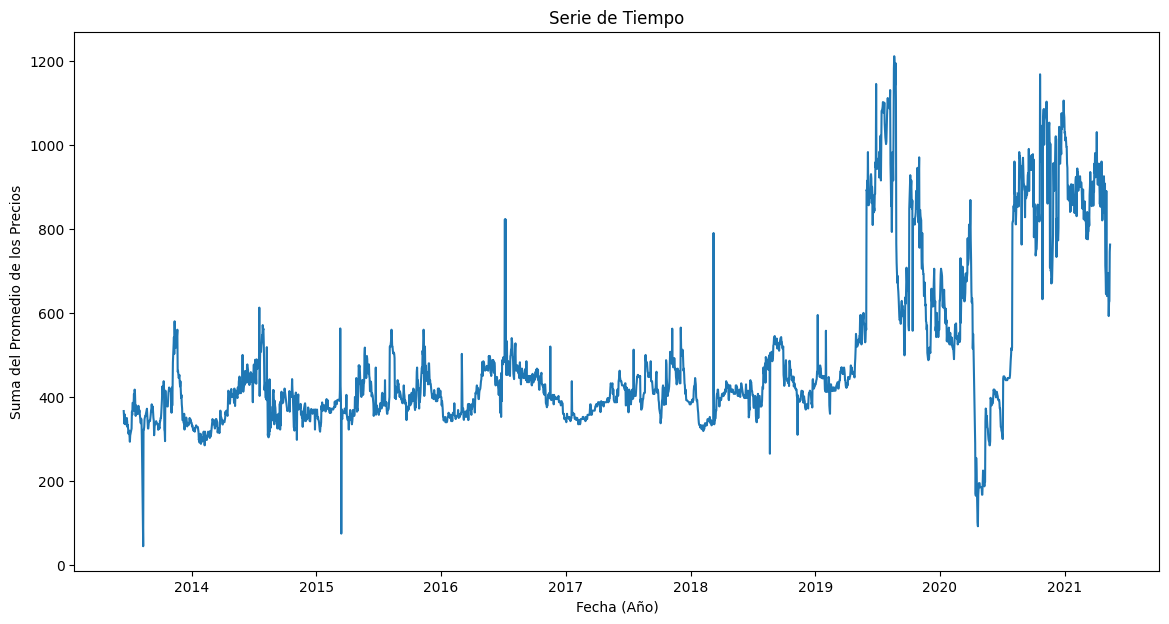

In [183]:
# Graficar serie de tiempo

plt.figure(figsize=(14, 7))
plt.plot(df_agrupado['Date'], df_agrupado['Average'])
plt.xlabel('Fecha (A√±o)')
plt.ylabel('Suma del Promedio de los Precios')
plt.title('Serie de Tiempo')
plt.show()

In [184]:
# Realizar descomposici√≥n de la se√±al, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
# Link : https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

# Ajustamos
series = df_agrupado.set_index('Date')['Average']
result = seasonal_decompose(series, model='additive', period = 365) #ver que onda el period
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2013-06-16   NaN
2013-06-17   NaN
2013-06-18   NaN
2013-06-19   NaN
2013-06-20   NaN
              ..
2021-05-09   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
Name: trend, Length: 2753, dtype: float64
Date
2013-06-16     0.885974
2013-06-17    43.154076
2013-06-18    67.151140
2013-06-19    73.518459
2013-06-20    83.650749
                ...    
2021-05-09   -87.152578
2021-05-10   -90.882323
2021-05-11   -92.902871
2021-05-12   -94.635748
2021-05-13   -94.404828
Name: seasonal, Length: 2753, dtype: float64
Date
2013-06-16   NaN
2013-06-17   NaN
2013-06-18   NaN
2013-06-19   NaN
2013-06-20   NaN
              ..
2021-05-09   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
Name: resid, Length: 2753, dtype: float64
Date
2013-06-16    366.5
2013-06-17    350.0
2013-06-18    336.5
2013-06-19    358.5
2013-06-20    346.5
              ...  
2021-05-09    592.5
2021-05-10    625.0
2021-05-11    628.0
2021-05-12    745.0
2021-05-13   

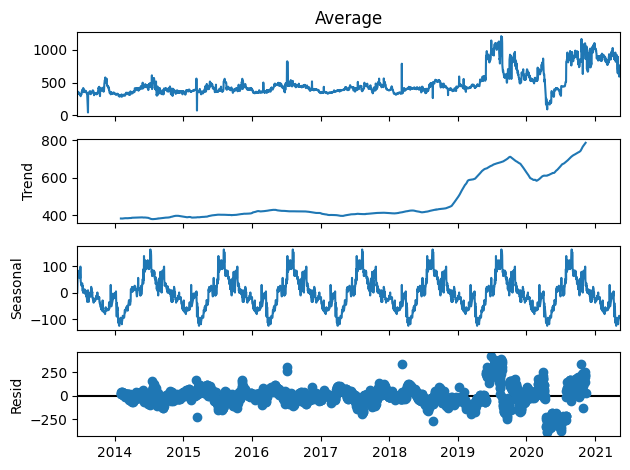

In [185]:
result.plot()
pyplot.show()

In [186]:
fecha_vieja = df['Date'].min()
fecha_nueva = df['Date'].max()
print('Fecha m√°s antigua del df : ', fecha_vieja)
print('Fecha m√°s nueva del df : ', fecha_nueva)

Fecha m√°s antigua del df :  2013-06-16 00:00:00
Fecha m√°s nueva del df :  2021-05-13 00:00:00


In [188]:
# Realizar Hold Out de 80/20

df_agrupado['set'] = np.where(df_agrupado['Date'] >= df_agrupado['Date'].quantile(0.8), 'test', 'train')

df_train = df_agrupado[df_agrupado['set'] == 'train'].copy()
df_test = df_agrupado[df_agrupado['set'] == 'test'].copy()

print(f'% destinado a train: {len(df_train) / len(df_agrupado):.2f}')
print(f'% destinado a test: {len(df_test) / len(df_agrupado):.2f}')

% destinado a train: 0.80
% destinado a test: 0.20


#### **1.2 Modelo Prophet**

A continuaci√≥n se genera un modelo Prophet para la predicci√≥n. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicci√≥n. Notar que el dataframe de predicci√≥n solo contiene una columna con nombre `ds`, al inicio.

In [164]:
#instalamos prophet
!pip install prophet

In [165]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**1. Generar dataframes de entrenamiento y testeo**

 Renombramos las columnas del dataframe original para poder aplicarlas bien en el modelo, el cual recibe los argumentos de 'ds' e 'y'
* ds : Date
* y : Average

In [191]:
df_train

Date  Average    set
0    2013-06-16    366.5  train
1    2013-06-17    350.0  train
2    2013-06-18    336.5  train
3    2013-06-19    358.5  train
4    2013-06-20    346.5  train
...         ...      ...    ...
2197 2019-10-26    902.5  train
2198 2019-10-27    945.0  train
2199 2019-10-28    885.0  train
2200 2019-10-29    945.0  train
2201 2019-10-30    815.0  train

[2202 rows x 3 columns]

In [198]:
# Respuesta
# Set de entrenamiento
df_new_train = df_train.drop("set", axis = 'columns')
df_new_train.columns = ['ds', 'y']
df_new_train.head(10)

ds      y
0 2013-06-16  366.5
1 2013-06-17  350.0
2 2013-06-18  336.5
3 2013-06-19  358.5
4 2013-06-20  346.5
5 2013-06-21  335.0
6 2013-06-25  350.0
7 2013-06-26  342.5
8 2013-06-27  328.5
9 2013-06-28  333.5

In [209]:
df_new_test = df_test.drop("set", axis = 'columns')
df_new_test.columns = ['ds', 'y']
df_new_test.head(10)

ds      y
2202 2019-10-31  925.0
2203 2019-11-01  970.0
2204 2019-11-02  755.0
2205 2019-11-03  842.5
2206 2019-11-04  845.0
2207 2019-11-05  830.0
2208 2019-11-06  825.0
2209 2019-11-07  820.0
2210 2019-11-08  735.0
2211 2019-11-09  705.0

**2. Modelo y entrenamiento**

In [210]:
# Respuesta, tal vez si menciono m√°s arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_new_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik4sv_dv/2_ui8saf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik4sv_dv/c6j84asd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47534', 'data', 'file=/tmp/tmpik4sv_dv/2_ui8saf.json', 'init=/tmp/tmpik4sv_dv/c6j84asd.json', 'output', 'file=/tmp/tmpik4sv_dv/prophet_model1kcieocy/prophet_model-20240524085137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicci√≥n.**

¬øQu√© muestra el dataframe de predicci√≥n una vez realizada la predicci√≥n? ¬øQu√© siginifican las distintas columnas?

In [224]:
fecha_buscada = '2020-05-21'
resultado = df.loc[df['Date'] == fecha_buscada]

In [225]:
resultado

SN             Commodity       Date Unit  Minimum  Maximum  \
167180  167180    Tomato Big(Nepali) 2020-05-21   Kg     25.0     30.0   
167181  167181  Tomato Small(Tunnel) 2020-05-21   Kg     30.0     35.0   
167182  167182            Potato Red 2020-05-21   Kg     30.0     32.0   
167183  167183          Potato White 2020-05-21   Kg     26.0     28.0   
167184  167184    Onion Dry (Indian) 2020-05-21   Kg     26.0     28.0   
...        ...                   ...        ...  ...      ...      ...   
167239  167239              Capsicum 2020-05-21   Kg     40.0     45.0   
167240  167240          Garlic Green 2020-05-21   Kg     80.0     90.0   
167241  167241       Coriander Green 2020-05-21   Kg     45.0     50.0   
167242  167242    Garlic Dry Chinese 2020-05-21   Kg    340.0    350.0   
167243  167243     Garlic Dry Nepali 2020-05-21   Kg    240.0    250.0   

        Average  
167180     27.5  
167181     32.5  
167182     31.0  
167183     27.0  
167184     27.0  
...         ...  
167239     42.5  
167240     85.0  
167241     47.5  
167242    345.0  
167243    245.0  

[64 rows x 7 columns]

In [207]:
# Respuesta

future = model.make_future_dataframe(periods=365)
future.tail(10)

ds
2557 2020-10-20
2558 2020-10-21
2559 2020-10-22
2560 2020-10-23
2561 2020-10-24
2562 2020-10-25
2563 2020-10-26
2564 2020-10-27
2565 2020-10-28
2566 2020-10-29

In [208]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

ds         yhat   yhat_lower   yhat_upper
2557 2020-10-20  1218.458496  1106.005932  1327.918286
2558 2020-10-21  1221.302412  1117.371129  1326.276475
2559 2020-10-22  1221.207209  1110.580035  1331.892957
2560 2020-10-23  1227.796335  1117.333097  1339.853387
2561 2020-10-24  1222.979850  1122.500432  1332.259771
2562 2020-10-25  1225.873833  1116.959984  1338.785764
2563 2020-10-26  1226.657506  1119.784656  1340.077024
2564 2020-10-27  1230.213492  1118.724878  1337.070328
2565 2020-10-28  1233.780245  1126.644146  1343.653331
2566 2020-10-29  1234.357609  1134.025787  1342.066467

In [222]:
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2202 non-null   datetime64[ns]
 1   y       2202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 116.1 KB


In [220]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          2567 non-null   datetime64[ns]
 1   trend                       2567 non-null   float64       
 2   yhat_lower                  2567 non-null   float64       
 3   yhat_upper                  2567 non-null   float64       
 4   trend_lower                 2567 non-null   float64       
 5   trend_upper                 2567 non-null   float64       
 6   additive_terms              2567 non-null   float64       
 7   additive_terms_lower        2567 non-null   float64       
 8   additive_terms_upper        2567 non-null   float64       
 9   weekly                      2567 non-null   float64       
 10  weekly_lower                2567 non-null   float64       
 11  weekly_upper                2567 non-null   float64     

* ds: Esta columna representa las fechas para las cuales se est√°n realizando las predicciones. En el contexto de tu problema, estas fechas ser√°n futuras a partir del √∫ltimo punto en tu conjunto de datos de entrenamiento. Por ejemplo, si tienes datos hasta el 13 de mayo de 2021 y est√°s prediciendo 365 d√≠as adicionales, las fechas en la columna ds corresponder√°n a los d√≠as posteriores al 13 de mayo de 2021.

* yhat: Esta columna contiene las predicciones del valor objetivo (en tu caso, el precio promedio de frutas y vegetales) realizadas por el modelo Prophet. Estas predicciones son las estimaciones centrales o el valor esperado de la variable objetivo para cada fecha en la columna ds.

* yhat_lower: Esta columna representa los l√≠mites inferiores de los intervalos de confianza para las predicciones realizadas por el modelo. En otras palabras, para cada fecha en la columna ds, yhat_lower proporciona una estimaci√≥n del valor m√≠nimo que se espera para el precio promedio de frutas y vegetales con cierto nivel de confianza.

* yhat_upper: Similar a yhat_lower, esta columna contiene los l√≠mites superiores de los intervalos de confianza para las predicciones del modelo. Para cada fecha en la columna ds, yhat_upper proporciona una estimaci√≥n del valor m√°ximo esperado para el precio promedio de frutas y vegetales con cierto nivel de confianza.

**Gr√°ficos de resultados**


Ahora, vemos el resultado de la predicci√≥n hecha a trav√©s de los gr√°ficos que vienen implementados en la libreria.

Se tienen gr√°ficos de la predicci√≥n del modelo y descomposici√≥n por componentes.

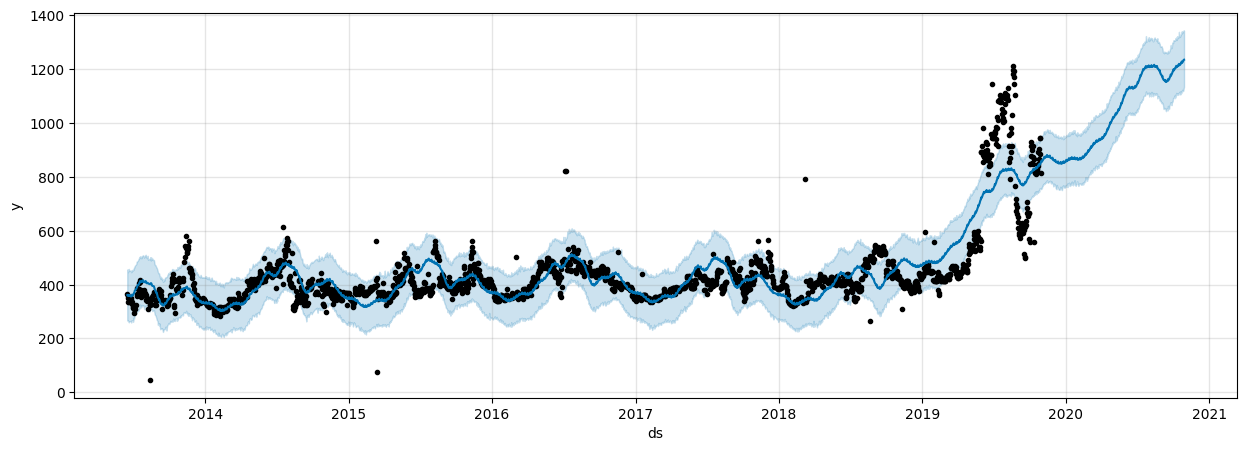

In [216]:
# plot forecast, est√°tico.
f, ax = plt.subplots(1,1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

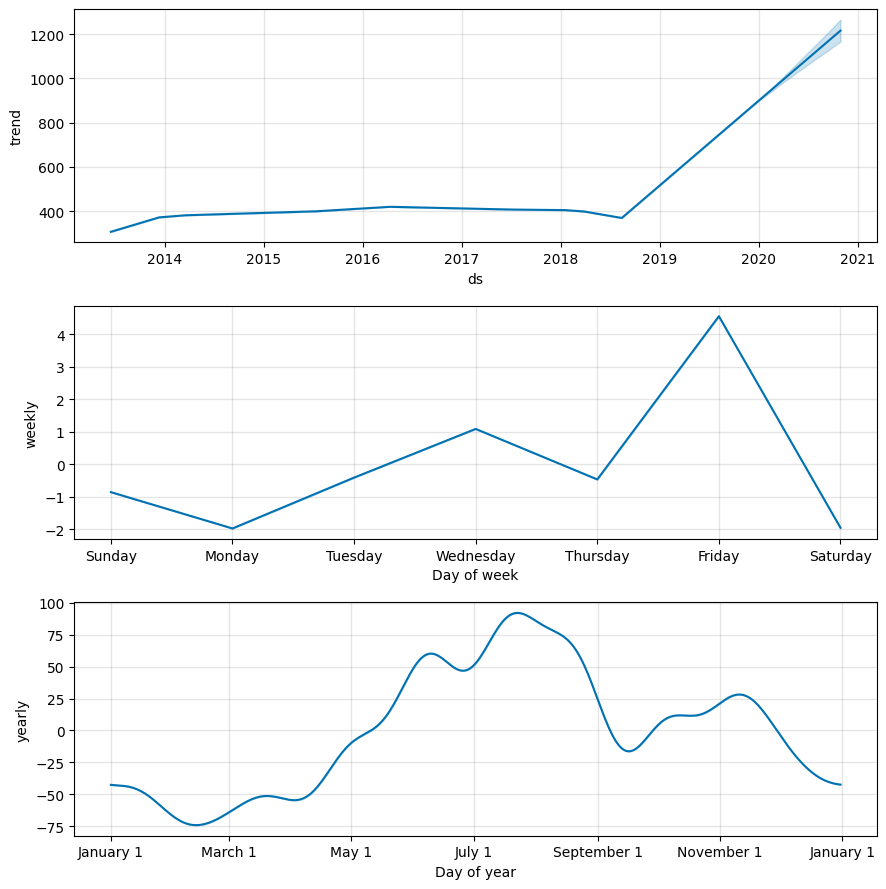

In [217]:
# descomposici√≥n por componentes, est√°tico
fig = model.plot_components(forecast)

#### **1.3 Resultados y m√©tricas**

En la presente secci√≥n se van a ver los resultados de la predicci√≥n, comparando con los resultados originales, as√≠ se obtienen m√©tricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gr√°fica de predicci√≥n con los datos reales. Agregar tres vistas: predicci√≥n del primer 15% de los datos, 50% de los datos y 100% de la predicci√≥n.
2. Calcular m√©tricas de error (RMSE, MAE, MAPE).

In [ ]:
# Respuesta

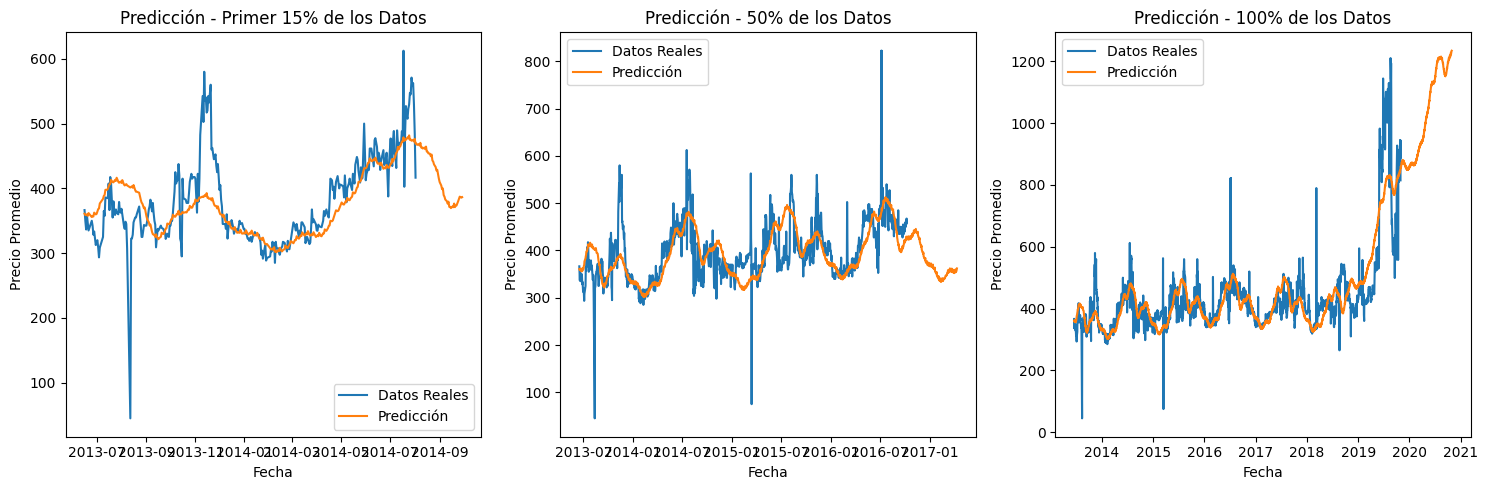

In [226]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Crear Gr√°fica de Predicci√≥n con Datos Reales
plt.figure(figsize=(15, 5))

# Vista del primer 15% de los datos
plt.subplot(1, 3, 1)
plt.plot(df_new_train['ds'][:int(len(df_new_train)*0.15)], df_new_train['y'][:int(len(df_new_train)*0.15)], label='Datos Reales')
plt.plot(forecast['ds'][:int(len(forecast)*0.15)], forecast['yhat'][:int(len(forecast)*0.15)], label='Predicci√≥n')
plt.title('Predicci√≥n - Primer 15% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()

# Vista del 50% de los datos
plt.subplot(1, 3, 2)
plt.plot(df_new_train['ds'][:int(len(df_new_train)*0.5)], df_new_train['y'][:int(len(df_new_train)*0.5)], label='Datos Reales')
plt.plot(forecast['ds'][:int(len(forecast)*0.5)], forecast['yhat'][:int(len(forecast)*0.5)], label='Predicci√≥n')
plt.title('Predicci√≥n - 50% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()

# Vista del 100% de la predicci√≥n
plt.subplot(1, 3, 3)
plt.plot(df_new_train['ds'], df_new_train['y'], label='Datos Reales')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicci√≥n')
plt.title('Predicci√≥n - 100% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Calcular M√©tricas de Error
y_true = df_new_train['y']
y_pred = forecast['yhat']

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("M√©tricas de Error:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Truncar las predicciones para que tengan la misma longitud que los datos reales
y_pred_truncado = y_pred[:len(y_true)]

# Calcular las m√©tricas de error con los datos truncados
rmse = mean_squared_error(y_true, y_pred_truncado, squared=False)
mae = mean_absolute_error(y_true, y_pred_truncado)
mape = np.mean(np.abs((y_true - y_pred_truncado) / y_true)) * 100

print("M√©tricas de Error:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


M√©tricas de Error:
RMSE: 73.10024201189812
MAE: 49.07908015423158
MAPE: 10.770229171800706


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio tambi√©n le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al a√±adir las festividades.


**1. Festividades y agregar a modelo**

In [ ]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [218]:
# Respuesta
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='Chile')
m.fit(df)


NameError: name 'holidays' is not defined

**2. Predecir**

In [ ]:
# Respuesta

**3. Resultados**

In [ ]:
# Respuesta

#plot de componentes

#plot de predicci√≥n

#resultados

¬øSon m√°s precisas las predicciones? ¬øQu√© otro festividad podr√≠a afectar a los precios de las frutas y verduras?

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas m√°s caras que otras. Adem√°s, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendr√°n que:
 1. Crear regresor con 1 y 0's seg√∫n corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los a√±os.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gr√°ficar resultados.

In [ ]:
# Respuesta

# **Sistemas de Recomendaci√≥n (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el h√°bito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podr√≠an servir, pero no sabe qu√© comprar, por lo que usted tendr√° que ayudarlo a buscar los elementos m√°s comprados por sus amigos para que √©l tambi√©n pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendaci√≥n por Ranking (baseline).
3. Recomendaci√≥n basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [ ]:
# se instala surprise library
!pip install surprise

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 772.0/772.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162995 sha256=7f096d46a15cbf79732cc92fb0ca2f0401649c80906e96bddfe4e66ddd4ef445
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID √∫nico de cada usuario
* `productId:` ID √∫nico de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [ ]:
df = pd.read_parquet('ratings_Electronics.parquet')
df.head()

user_id  prod_id  rating
189     3188        0     5.0
200     4980        0     4.0
314     5374        0     5.0
389     6293        0     5.0
406     4879        0     3.0

### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un peque√±o an√°lisis exploratorio:

Reportar la cantidad de usuarios y productos √∫nicos:

In [ ]:
# Respuesta

Verificar que no hayan valores nulos

In [ ]:
# Respuesta

Graficar distribuci√≥n de los ratings

In [ ]:
# Respuesta

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [ ]:
# Respuesta

A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aqu√≠:

1.
2.
3.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [ ]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [ ]:
from surprise.model_selection import train_test_split

# Respuesta

## **2.3 Baseline**

El objetivo de esta secci√≥n es generar un *baseline* en las recomendaciones a partir de una aproximaci√≥n *dummy* para resolver el problema de recomendaci√≥n. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadr√°tico medio. Entregue una interpretaci√≥n de su resultado

In [ ]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

# Respuesta

In [ ]:
# Evaluar con MAE

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta secci√≥n, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En espec√≠fico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadr√°tico medio de sus recomendaciones y comente. ¬øQu√© enfoque tienen un mejor rendimiento? ¬øSe alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¬øSon diferentes sus resultados? ¬øPorqu√©?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podr√≠a servir apoyarse de esta [documentaci√≥n](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [ ]:
def get_user_top_k(predictions, user, k = 10):

  # predecir los rating filtrados por usuario user
  predicted_ratings =

  # Ordenar las predicciones
  sorted_predicted_ratings =

  return sorted_predicted_ratings[:k]

In [ ]:
from surprise.accuracy import mse

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model =

# entrenar

#predecir en dataframe de testeo

predictions =  # retornar un dataframe con el rating estimado para cada (user_id, item_id)

# obtener mse


Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2122
[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[(2679, 5),
 (1326, 4.799755049750801),
 (4650, 4.399861310283875),
 (1692, 4.333333333333333),
 (4363, 4.199459547276517)]

In [ ]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

In [ ]:
# entrenar algoritmo base a items, obtener MSE

sim_options =

# algoritmo base a items.

item_model =

# entrenar

#predecir en dataframe de testeo

predictions =

# obtener mse

In [ ]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego eval√∫e sus predicciones en el conjunto de test. Luego, responda:

- ¬øEn qu√© se diferencia este tipo de modelos de los modelos basados en memoria?
- ¬øQu√© significa el par√°metro `num_factors`? ¬øDe qu√© manera podr√≠a impactar en el ajuste del modelo?
- ¬øQu√© indican los par√°metros $\mu$, $b_u$, $b_i$? ¬øQu√© cuidado se debe tener al utilizarlos?
- Obtenga el error cuadr√°tico medio de sus recomendaciones y comente. ¬øSe alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¬øSon diferentes sus resultados? ¬øPorqu√©?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [ ]:
# Respuesta

model =

# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)

predictions =

In [ ]:
# calcular mae
from surprise.accuracy import mae
mae(predictions)

###**Comentarios Finales**

* ¬øQu√© sistema de recomendaci√≥n presenta mejores m√©tricas? ¬øA qu√© se podr√≠a deber esto?
* ¬øEs posible mejorar sus resultados? Si es as√≠, proponga al menos 2 mejoras.